# Deep Learning for Image Classification Assessment


Welcome to your assessment! Follow the instructions in bold below to complete the assessment.

If you get stuck, check out the solutions video and notebook. (Make sure to run the solutions notebook before posting a question to the QA forum please, thanks!)

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [35]:
from keras.datasets import fashion_mnist
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

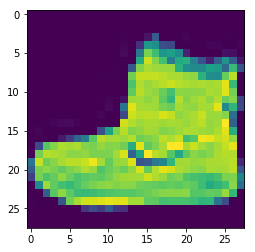

In [36]:
plt.imshow(x_train[0])

In [37]:
y_test


array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [38]:
x_train = x_train/x_train.max()

x_test  = x_test/x_test.max()
x_train.shape

(60000, 28, 28)

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [39]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_train.shape
x_test = x_test.reshape(10000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [40]:
from keras.utils.np_utils import to_categorical 

In [41]:
Y_train_cat = to_categorical(y_train,10) 
Y_test_cat = to_categorical(y_test,10)


In [42]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D, Flatten


## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [43]:
model = Sequential()
# Convolutional Layers 
model.add(Conv2D(filters=32, kernel_size = (4,4), input_shape = (28, 28, 1), activation = 'relu'))
# Pooling Layer 
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [45]:
model.fit(x_train, Y_train_cat, verbose = 1 , epochs = 20)

Epoch 1/20
60000/60000 [==============================] - 27s 453us/step - loss: 0.4020 - acc: 0.8571
Epoch 2/20
60000/60000 [==============================] - 28s 461us/step - loss: 0.2779 - acc: 0.9005
Epoch 3/20
60000/60000 [==============================] - 27s 448us/step - loss: 0.2392 - acc: 0.9140
Epoch 4/20
60000/60000 [==============================] - 27s 446us/step - loss: 0.2136 - acc: 0.9235
Epoch 5/20
60000/60000 [==============================] - 27s 451us/step - loss: 0.1967 - acc: 0.9294
Epoch 6/20
60000/60000 [==============================] - 27s 444us/step - loss: 0.1816 - acc: 0.9349
Epoch 7/20
60000/60000 [==============================] - 28s 461us/step - loss: 0.1681 - acc: 0.9403
Epoch 8/20
60000/60000 [==============================] - 28s 469us/step - loss: 0.1569 - acc: 0.9436
Epoch 9/20
60000/60000 [==============================] - 29s 478us/step - loss: 0.1490 - acc: 0.9473
Epoch 10/20
60000/60000 [==============================] - 29s 476us/step - loss: 

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [46]:
model.metrics_names



['loss', 'acc']

In [47]:
model.evaluate(x_test, Y_test_cat)

10000/10000 [==============================] - 1s 105us/step


[0.5059140192493796, 0.9042]

In [59]:
from sklearn.metrics import classification_report , confusion_matrix

In [60]:
predictions = model.predict_classes(x_test)

In [61]:
predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [62]:
confusion_matrix(y_test,predictions)

array([[819,   1,  21,  14,   2,   1, 137,   0,   5,   0],
       [  7, 968,   2,  14,   0,   0,   7,   1,   1,   0],
       [ 15,   0, 883,   5,  23,   0,  73,   0,   0,   1],
       [ 10,   4,  14, 919,   9,   0,  44,   0,   0,   0],
       [  1,   1,  94,  39, 766,   0,  99,   0,   0,   0],
       [  0,   0,   0,   1,   0, 961,   0,  19,   0,  19],
       [ 74,   0,  46,  16,  28,   0, 832,   0,   4,   0],
       [  0,   0,   0,   0,   0,   9,   0, 950,   0,  41],
       [  4,   1,   3,   5,   2,   2,  13,   3, 966,   1],
       [  0,   0,   0,   0,   0,   4,   1,  17,   0, 978]], dtype=int64)

In [63]:
print(classification_report(y_test, predictions))


             precision    recall  f1-score   support

          0       0.88      0.82      0.85      1000
          1       0.99      0.97      0.98      1000
          2       0.83      0.88      0.86      1000
          3       0.91      0.92      0.91      1000
          4       0.92      0.77      0.84      1000
          5       0.98      0.96      0.97      1000
          6       0.69      0.83      0.75      1000
          7       0.96      0.95      0.95      1000
          8       0.99      0.97      0.98      1000
          9       0.94      0.98      0.96      1000

avg / total       0.91      0.90      0.91     10000



# Great Job!